In [18]:
import numpy as np
import statistics as stats
import pandas as pd

In [22]:
import pandas as pd 
df=pd.read_excel("/content/final_dataset.xlsx")
df

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (17/18),Crosses (17/18),Interceptions (17/18),Penalty Kicks Won (17/18),Penalties Conceded (17/18),Own Goals (17/18),Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,23.0,62.0,1.0,1.0,0.0,0.0,98.0,1.0,4.0,20.0
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,43.0,24.0,7.0,1.0,0.0,0.0,124.0,69.0,111.0,38.3
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,1.0,15.0,6.0,0.0,0.0,0.0,57.0,3.0,14.0,17.6
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,18.0,50.0,13.0,1.0,0.0,0.0,219.0,19.0,58.0,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,Matis Carvalho,Montpellier HSC,22,Goalkeeper,Portugal,180000,1,Ligue 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,Lorenzo Andrenacci,Genoa CFC,26,Goalkeeper,Italy,135000,3,Serie A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,Mamadou Doucoure,Borussia Mönchengladbach,23,Defender,France,90000,3,Bundesliga,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,Michael Langer,FC Schalke 04,36,Goalkeeper,Austria,90000,1,Bundesliga,Schalke 04,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Se observan varias columnas tiene valores nulos,pero en este caso no podemos eliminar las columnas porque 
# varios de estos valores nulos se refieren jugadores que en esas temporadas estaban lesionados o no habian debutado 
# jugadores profesionales
(df.isnull().sum() / len(df))*100

Player                                  0.000000
Club                                    0.000000
Age                                     0.000000
Position                                0.000000
Nation                                  0.000000
                                         ...    
Own Goals (17/18)                      44.385542
Total Loose Balls Recovered (17/18)    44.289157
Aerial Duel Won (17/18)                44.289157
Aerial Duel Lost (17/18)               44.289157
% Aerial Duels Won (17/18)             49.301205
Length: 548, dtype: float64

In [24]:
len(df.columns[df.isnull().any()])


540

In [25]:
df.dtypes

Player                                  object
Club                                    object
Age                                      int64
Position                                object
Nation                                  object
                                        ...   
Own Goals (17/18)                      float64
Total Loose Balls Recovered (17/18)    float64
Aerial Duel Won (17/18)                float64
Aerial Duel Lost (17/18)               float64
% Aerial Duels Won (17/18)             float64
Length: 548, dtype: object

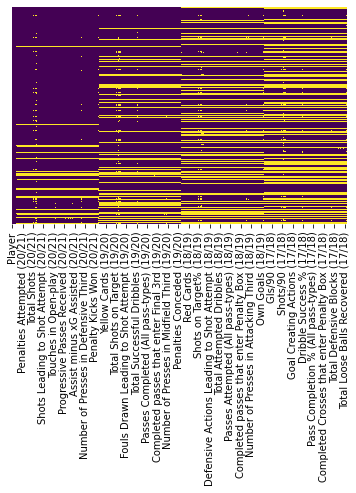

In [5]:
#observamos la dispersion de los datos nulos dentro nuestro heatmap
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [13]:
def avg_missing(df):
    
    df.fillna("Not Played", inplace = True)
    
    df21 = df.iloc[:,9:143]
    df20 = df.iloc[:,144:278]
    df19 = df.iloc[:,279:413]
    df18 = df.iloc[:,414:]
    
    for a in list(range(len(df))):
        
        #Fixing 2020-2021 missing values
        for b in list(range(len(df21.columns))):
        
            if type(df21.iloc[:,b][a]) != float:

                if type(df20.iloc[:,b][a]) != float and type(df19.iloc[:,b][a]) != float and type(df18.iloc[:,b][a]) == float:
                    df21.iloc[:,b][a] = df18.iloc[:,b][a]

                if type(df20.iloc[:,b][a]) != float and type(df19.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) != float:
                    df21.iloc[:,b][a] = df19.iloc[:,b][a]

                if type(df20.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) != float and type(df18.iloc[:,b][a]) != float:
                    df21.iloc[:,b][a] = df20.iloc[:,b][a]

                if type(df20.iloc[:,b][a]) != float and type(df19.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) == float:
                    df21.iloc[:,b][a] = round(stats.mean([df19.iloc[:,b][a],df18.iloc[:,b][a]]),2)

                if type(df20.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) != float:
                    df21.iloc[:,b][a] = round(stats.mean([df19.iloc[:,b][a],df20.iloc[:,b][a]]),2)

                if type(df20.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) != float and type(df18.iloc[:,b][a]) == float:
                    df21.iloc[:,b][a] = round(stats.mean([df18.iloc[:,b][a],df20.iloc[:,b][a]]),2)

                if type(df20.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) == float:
                    df21.iloc[:,b][a] = round(stats.mean([df18.iloc[:,b][a],df19.iloc[:,b][a],df20.iloc[:,b][a]]),2)
        
    for a in list(range(len(df))):  
        #Fixing 2019-2020 missing values
        for b in list(range(len(df20.columns))):
        
            if type(df20.iloc[:,b][a]) != float:

                if type(df21.iloc[:,b][a]) != float and type(df19.iloc[:,b][a]) != float and type(df18.iloc[:,b][a]) == float:
                    df20.iloc[:,b][a] = df18.iloc[:,b][a]

                if type(df21.iloc[:,b][a]) != float and type(df19.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) != float:
                    df20.iloc[:,b][a] = df19.iloc[:,b][a]

                if type(df21.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) != float and type(df18.iloc[:,b][a]) != float:
                    df20.iloc[:,b][a] = df21.iloc[:,b][a]

                if type(df21.iloc[:,b][a]) != float and type(df19.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) == float:
                    df20.iloc[:,b][a] = round(stats.mean([df19.iloc[:,b][a],df18.iloc[:,b][a]]),2)

                if type(df21.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) != float:
                    df20.iloc[:,b][a] = round(stats.mean([df19.iloc[:,b][a],df21.iloc[:,b][a]]),2)

                if type(df21.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) != float and type(df18.iloc[:,b][a]) == float:
                    df20.iloc[:,b][a] = round(stats.mean([df18.iloc[:,b][a],df21.iloc[:,b][a]]),2)

                if type(df21.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) == float:
                    df20.iloc[:,b][a] = round(stats.mean([df18.iloc[:,b][a],df19.iloc[:,b][a],df21.iloc[:,b][a]]),2)

    for a in list(range(len(df))):              
        #Fixing 2018-2019 missing values
        for b in list(range(len(df19.columns))):
        
            if type(df19.iloc[:,b][a]) != float:

                if type(df21.iloc[:,b][a]) != float and type(df20.iloc[:,b][a]) != float and type(df18.iloc[:,b][a]) == float:
                    df19.iloc[:,b][a] = df18.iloc[:,b][a]

                if type(df21.iloc[:,b][a]) != float and type(df20.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) != float:
                    df19.iloc[:,b][a] = df20.iloc[:,b][a]

                if type(df21.iloc[:,b][a]) == float and type(df20.iloc[:,b][a]) != float and type(df18.iloc[:,b][a]) != float:
                    df19.iloc[:,b][a] = df21.iloc[:,b][a]

                if type(df21.iloc[:,b][a]) != float and type(df20.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) == float:
                    df19.iloc[:,b][a] = round(stats.mean([df20.iloc[:,b][a],df18.iloc[:,b][a]]),2)

                if type(df21.iloc[:,b][a]) == float and type(df20.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) != float:
                    df19.iloc[:,b][a] = round(stats.mean([df20.iloc[:,b][a],df21.iloc[:,b][a]]),2)

                if type(df21.iloc[:,b][a]) == float and type(df20.iloc[:,b][a]) != float and type(df18.iloc[:,b][a]) == float:
                    df19.iloc[:,b][a] = round(stats.mean([df18.iloc[:,b][a],df21.iloc[:,b][a]]),2)

                if type(df21.iloc[:,b][a]) == float and type(df20.iloc[:,b][a]) == float and type(df18.iloc[:,b][a]) == float:
                    df19.iloc[:,b][a] = round(stats.mean([df18.iloc[:,b][a],df20.iloc[:,b][a],df21.iloc[:,b][a]]),2)
                    
    for a in list(range(len(df))):
        #Fixing 2017-2018 missing values            
        for b in list(range(len(df18.columns))):

            if type(df18.iloc[:,b][a]) != float:

                if type(df21.iloc[:,b][a]) != float and type(df20.iloc[:,b][a]) != float and type(df19.iloc[:,b][a]) == float:
                    df18.iloc[:,b][a] = df19.iloc[:,b][a]

                if type(df21.iloc[:,b][a]) != float and type(df20.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) != float:
                    df18.iloc[:,b][a] = df20.iloc[:,b][a]

                if type(df21.iloc[:,b][a]) == float and type(df20.iloc[:,b][a]) != float and type(df19.iloc[:,b][a]) != float:
                    df18.iloc[:,b][a] = df21.iloc[:,b][a]

                if type(df21.iloc[:,b][a]) != float and type(df20.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) == float:
                    df18.iloc[:,b][a] = round(stats.mean([df20.iloc[:,b][a],df19.iloc[:,b][a]]),2)

                if type(df21.iloc[:,b][a]) == float and type(df20.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) != float:
                    df18.iloc[:,b][a] = round(stats.mean([df20.iloc[:,b][a],df21.iloc[:,b][a]]),2)

                if type(df21.iloc[:,b][a]) == float and type(df20.iloc[:,b][a]) != float and type(df19.iloc[:,b][a]) == float:
                    df18.iloc[:,b][a] = round(stats.mean([df19.iloc[:,b][a],df21.iloc[:,b][a]]),2)

                if type(df21.iloc[:,b][a]) == float and type(df20.iloc[:,b][a]) == float and type(df19.iloc[:,b][a]) == float:
                    df18.iloc[:,b][a] = round(stats.mean([df19.iloc[:,b][a],df20.iloc[:,b][a],df21.iloc[:,b][a]]),2)

    #Appending average filled missing data to final dataset               
    df_tm = df.iloc[:,:8]

    final = pd.concat([df_tm,df21,df20,df19,df18],axis=1)

    final = final.replace('Not Played', np.nan)
    
    final = final.dropna()
    
    return final

In [26]:
df = avg_missing(df)


In [27]:
df.head()

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,MP (20/21),Starts (20/21),...,Offsides (17/18),Crosses (17/18),Interceptions (17/18),Penalty Kicks Won (17/18),Penalties Conceded (17/18),Own Goals (17/18),Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,31.0,27.0,...,23.0,62.0,1.0,1.0,0.0,0.0,98.0,1.0,4.0,20.0
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,28.0,27.0,...,9.0,8.5,5.0,0.5,0.0,0.0,70.0,29.0,31.5,47.9
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,35.0,35.0,...,43.0,24.0,7.0,1.0,0.0,0.0,124.0,69.0,111.0,38.3
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,26.0,24.0,...,1.0,15.0,6.0,0.0,0.0,0.0,57.0,3.0,14.0,17.6
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,37.0,34.0,...,18.0,50.0,13.0,1.0,0.0,0.0,219.0,19.0,58.0,24.7


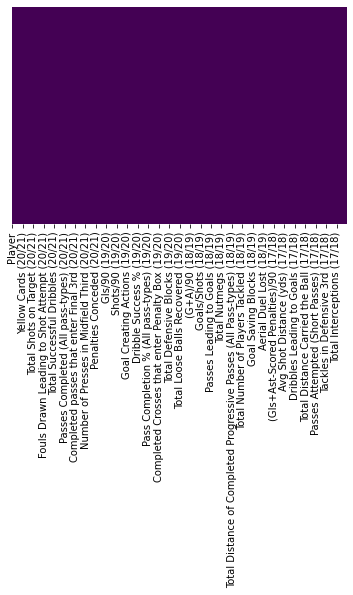

In [28]:
#observamos la dispersion de los datos nulos dentro nuestro heatmap
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
#Para mayor facilidad mas adelante en el manejo de datos , se ponen en mayuscula todos valores de texto dentro de los datos 
df=df.apply(lambda x: x.astype(str).str.upper())
df.head()

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,MP (20/21),Starts (20/21),...,Offsides (17/18),Crosses (17/18),Interceptions (17/18),Penalty Kicks Won (17/18),Penalties Conceded (17/18),Own Goals (17/18),Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18)
0,KYLIAN MBAPPE,PARIS SAINT-GERMAIN,22,ATTACK,FRANCE,144000000,1,LIGUE 1,31.0,27.0,...,23.0,62.0,1.0,1.0,0.0,0.0,98.0,1.0,4.0,20.0
1,ERLING HAALAND,BORUSSIA DORTMUND,21,ATTACK,NORWAY,117000000,3,BUNDESLIGA,28.0,27.0,...,9.0,8.5,5.0,0.5,0.0,0.0,70.0,29.0,31.5,47.9
2,HARRY KANE,TOTTENHAM HOTSPUR,28,ATTACK,ENGLAND,108000000,3,PREMIER LEAGUE,35.0,35.0,...,43.0,24.0,7.0,1.0,0.0,0.0,124.0,69.0,111.0,38.3
3,JADON SANCHO,MANCHESTER UNITED,21,ATTACK,ENGLAND,90000000,5,PREMIER LEAGUE,26.0,24.0,...,1.0,15.0,6.0,0.0,0.0,0.0,57.0,3.0,14.0,17.6
4,MOHAMED SALAH,LIVERPOOL FC,29,ATTACK,EGYPT,90000000,2,PREMIER LEAGUE,37.0,34.0,...,18.0,50.0,13.0,1.0,0.0,0.0,219.0,19.0,58.0,24.7


In [30]:
# se verfica que unicamente no hallan 4 posiciones ,NOTA: ejemplo no se encuentren valores como defender y defense que hacen referencia 
# a la misma Posicion pero python los toma diferentes entonces toca verificar que no hallan posicion repetidas con diferente nombre  
df['Position'].value_counts()

DEFENDER      670
MIDFIELD      559
ATTACK        534
GOALKEEPER      4
Name: Position, dtype: int64

In [31]:
#el mismo analisis al anterior a la linea de arriba pero para la ligas 
df['League'].value_counts()

PREMIER LEAGUE    388
SERIE A           378
LA LIGA           355
LIGUE 1           326
BUNDESLIGA        320
Name: League, dtype: int64

In [32]:
#se crea una lista de los valores de las ligas 
a=df['League'].value_counts().reset_index()
b=list(a['index'])
b

['PREMIER LEAGUE', 'SERIE A', 'LA LIGA', 'LIGUE 1', 'BUNDESLIGA']

In [33]:
#Se hace un for para verificar de acuerdo a cada liga que no hallan equipos repetidos con diferente nombre.
for i in range(0,len(b)):
  a=df[df['League']==b[i]]
  print(a['Club'].value_counts())

CHELSEA FC                    23
LEICESTER CITY                23
EVERTON FC                    23
MANCHESTER UNITED             23
LIVERPOOL FC                  22
NEWCASTLE                     21
TOTTENHAM HOTSPUR             20
FULHAM FC                     20
SHEFFIELD UNITED              20
BURNLEY FC                    19
MANCHESTER CITY               19
WEST HAM UNITED               19
ARSENAL FC                    19
ASTON VILLA                   19
BRIGHTON &AMP; HOVE ALBION    19
CRYSTAL PALACE                18
SOUTHAMPTON FC                18
WOLVERHAMPTON WANDERERS       17
LEEDS UNITED                  15
WEST BROMWICH ALBION          11
Name: Club, dtype: int64
SS LAZIO             25
AC MILAN             23
TORINO FC            22
JUVENTUS FC          22
INTER MILAN          21
SSC NAPOLI           21
AS ROMA              21
UDINESE CALCIO       21
GENOA CFC            20
ATALANTA BC          20
BOLOGNA FC 1909      19
CAGLIARI             19
UC SAMPDORIA         19
US 

In [34]:
df.to_csv("Limpienza_data_Transfermarkt.csv")